In [12]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
a_file = open("/content/drive/My Drive/Datasets/DL/Lab4/quotes.txt", "r+")

In [4]:
from keras.preprocessing.text import text_to_word_sequence
lst=[]
for i in a_file:
  lst.append(text_to_word_sequence(i))

In [5]:
y=[]
for i in range(len(lst)):
  y.append(lst[i].pop())

In [6]:
for i in range(len(lst)):
  lst[i]=" ".join(lst[i])

In [7]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
for i in range(len(lst)):
  word_tokens = word_tokenize(lst[i])
  filtered_sentence = [] 
  
  for w in word_tokens: 
      if w not in stop_words: 
          filtered_sentence.append(w) 
  lst[i] = filtered_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
unique=[]
for i in lst:
  for j in i:
    if(j not in unique):
      unique.append(j)

In [9]:
for i in range(len(lst)):
  lst[i]=" ".join(lst[i])

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

corpus = lst
df = pd.DataFrame(data=corpus, columns=['sentences'])

vectorizer = CountVectorizer(vocabulary=unique, min_df=0 , stop_words=frozenset(), token_pattern=r"(?u)\b\w+\b")
X = vectorizer.fit_transform(df['sentences'].values)
result = pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names())


In [13]:
X=np.array(result)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [15]:
class TestCallback():
    def __init__(self, test_data):
        self.test_data = X_test

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

In [16]:
import tensorflow.keras as keras
import tensorflow as tf
import time

train_accuracy=[]
test_accuracy=[]
runtime_test=[]

for i in range(3,11):

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(2**i, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

  model.compile(optimizer ='adam' , loss = 'binary_crossentropy' ,metrics =['accuracy'])
  model.fit(X_train , y_train , epochs = 100)

  val_loss_train, val_acc_train = model.evaluate(X_train, y_train)
  train_accuracy.append(val_acc_train)

  start_time = time.time()
  val_loss_test, val_acc_test = model.evaluate(X_test, y_test)
  test_accuracy.append(val_acc_test)
  runtime_test.append((time.time() - start_time))

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7263 - accuracy: 0.4000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7250 - accuracy: 0.4000
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7237 - accuracy: 0.4000
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7224 - accuracy: 0.4000
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.4000
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7200 - accuracy: 0.4000
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.7188 - accuracy: 0.4000
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7177 - accuracy: 0.4000
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7166 - accuracy: 0.4667
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.4667
Epoch 11/100
1/1 [===========

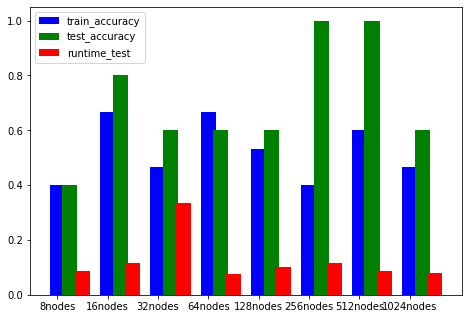

In [17]:
import matplotlib.pyplot as plt
data = [train_accuracy, test_accuracy, runtime_test]
X = np.arange(8)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.3 , tick_label=["8nodes","16nodes","32nodes", "64nodes","128nodes","256nodes","512nodes","1024nodes"])
ax.bar(X + 0.25, data[1], color = 'g', width = 0.3)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.3)
ax.legend(labels=['train_accuracy', 'test_accuracy','runtime_test'])

In [18]:
print('Accuracy: %.2f' % (max(test_accuracy)*100))

Accuracy: 100.00


In [19]:
import tensorflow.keras as keras
import tensorflow as tf
import time

train_accuracy=[]
test_accuracy=[]
runtime_test=[]

for i in range(2,6):

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
  model.add(tf.keras.layers.Dense(i, activation=tf.nn.softmax))

  model.compile(optimizer ='adam' , loss = 'binary_crossentropy' ,metrics =['accuracy'])
  model.fit(X_train , y_train , epochs = 100)

  val_loss_train, val_acc_train = model.evaluate(X_train, y_train)
  train_accuracy.append(val_acc_train)

  start_time = time.time()
  val_loss_test, val_acc_test = model.evaluate(X_test, y_test)
  test_accuracy.append(val_acc_test)
  runtime_test.append((time.time() - start_time))

Epoch 1/100
1/1 [==============================] - 0s 3ms/step - loss: 0.7054 - accuracy: 0.6000
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7043 - accuracy: 0.5333
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7032 - accuracy: 0.5333
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.5333
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.4667
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5333
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6999 - accuracy: 0.4667
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.5333
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.5333
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5333
Epoch 11/100
1/1 [===========

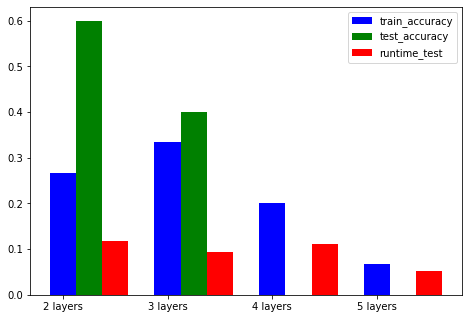

In [20]:
data = [train_accuracy, test_accuracy, runtime_test]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25,tick_label=["2 layers","3 layers","4 layers", "5 layers"])
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
ax.legend(labels=['train_accuracy', 'test_accuracy','runtime_test'])

In [21]:
print('Accuracy: %.2f' % (max(test_accuracy)*100))

Accuracy: 60.00
